### Description

- User opens terminal
- User gets asked about the ziel funktions vektor
- User types in the linear inequity constraints
- Program visualizes the constrains the the ziel funktionsvektor
- in case of integer linear programming the solution will be visible in the plot
- in the relaxation of an integer linear progam the user may want to use the branch-and-bound method to identify the optimal point

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

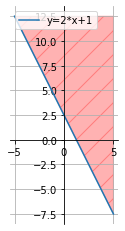

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

def f(x):
    return -2*x+2.5

x = np.linspace(-5, 5)
y = f(x)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.plot(x, y, label="y=2*x+1")

# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))


plt.fill_between(
    x=x,
    y1=y,
    y2=np.max(y),
    color="red",
    alpha=0.3,
    hatch="/"
)
plt.grid()
plt.set_aspect("equal")

plt.legend(loc="upper left")
plt.show()